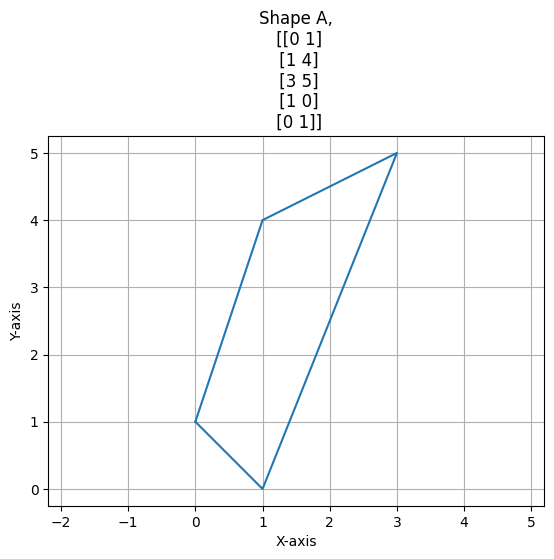

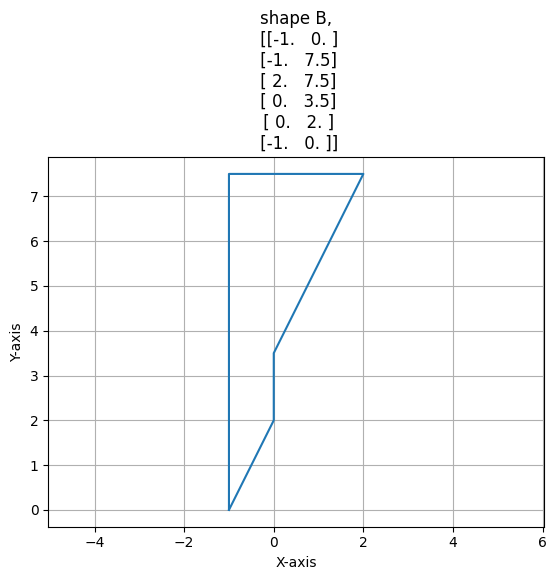

In [4]:
# TASK 1
import numpy as np
import matplotlib.pyplot as plt 

def plot2D_obj(obj, title):
    plt.plot(obj[:, 0], obj[:, 1])
    # naming
    plt.title(f"{title},\n {obj}")
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.axis('equal') 

    plt.show()

def plot3D_obj(obj, title):
    plt.plot(obj[:, 0], obj[:, 1], obj[:, 2])
    # naming
    plt.title(f"{title},\n {obj}")
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt
    plt.grid(True)
    plt.axis('equal') 

    plt.show()

shapeA = np.array([[0, 1], [1, 4], [3, 5], [1, 0], [0, 1]])

plot2D_obj(shapeA, 'Shape A')

shapeB = np.array([[-1, 0], [-1, 7.5], [2, 7.5], [0, 3.5], [0, 2], [-1, 0]])

plot2D_obj(shapeB, 'shape B')

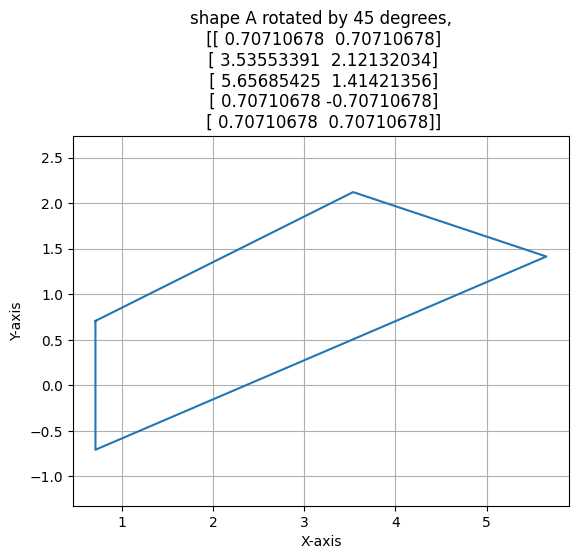

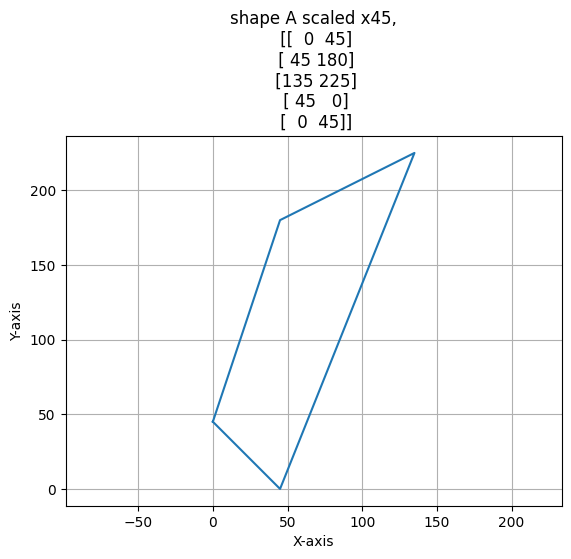

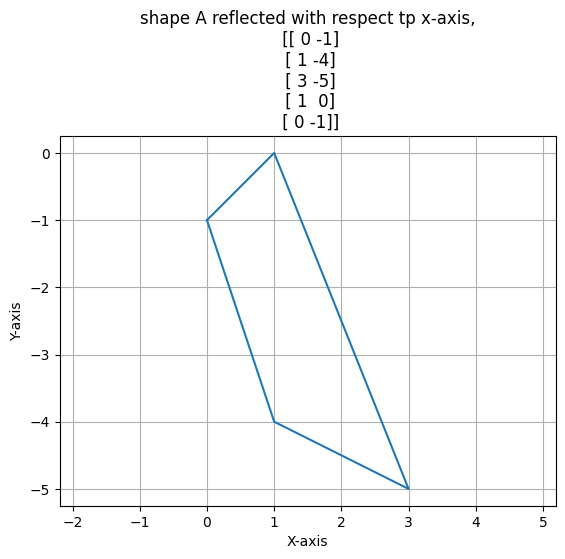

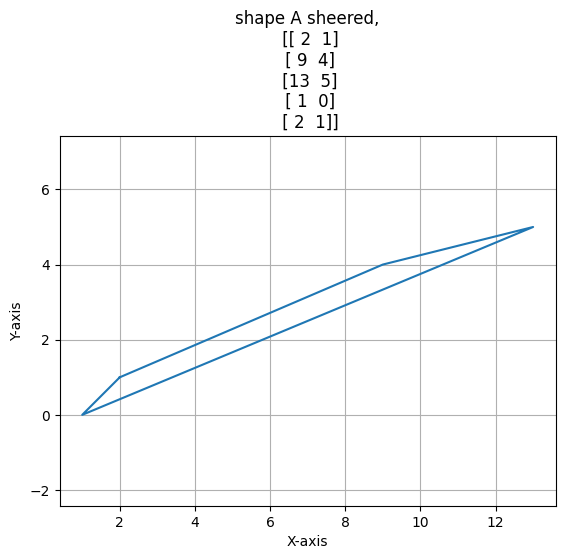

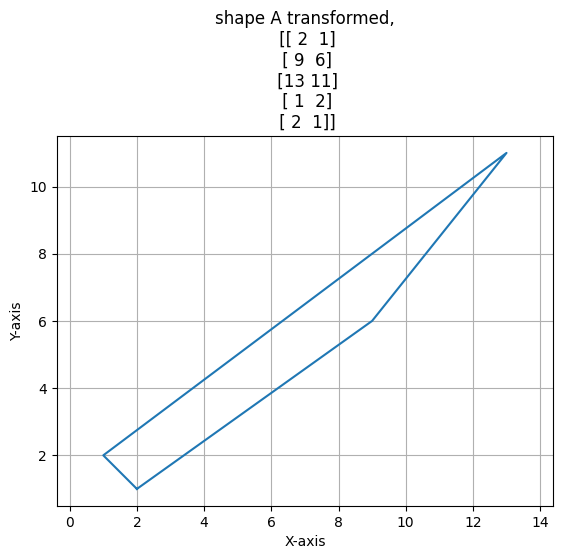

In [2]:
# TASK 1 functions

def rotate_obj(obj, angle):
    rad_angle = -np.radians(angle)

    rotation_matrix = np.array([[np.cos(rad_angle), -np.sin(rad_angle)],
                                [np.sin(rad_angle), np.cos(rad_angle)]])
    return obj @ rotation_matrix.T

plot2D_obj(rotate_obj(shapeA, 45), 'shape A rotated by 45 degrees')

def scale_object(obj, scale_factor):
    scale_matrix = np.array([[scale_factor, 0],
                             [0, scale_factor]])
    return obj @ scale_matrix.T

plot2D_obj(scale_object(shapeA, 45), 'shape A scaled x45')

def reflect_object(obj, axis):
    if axis == 'x':
        reflect_matrix = np.array([[1, 0],
                                   [0, -1]])
    elif axis == 'y':
        reflect_matrix = np.array([[-1, 0],
                                   [0, 1]])
    else:
        raise ValueError("Axis must be 'x' or 'y'")
    return obj @ reflect_matrix.T

plot2D_obj(reflect_object(shapeA, 'x'), 'shape A reflected with respect tp x-axis')

def shear_object(obj, shear_factor, axis):
    if axis == 'x':
        shear_matrix = np.array([[1, shear_factor],
                                 [0, 1]])
    elif axis == 'y':
        shear_matrix = np.array([[1, 0],
                                 [shear_factor, 1]])
    else:
        raise ValueError("Axis must be 'x' or 'y'")
    return obj @ shear_matrix.T

plot2D_obj(shear_object(shapeA, 2, 'x'), 'shape A sheered')

def transform_object(obj, transformation_matrix):
    return obj @ transformation_matrix.T

plot2D_obj(transform_object(shapeA, np.array([[1, 2], [2, 1]])), 'shape A transformed')


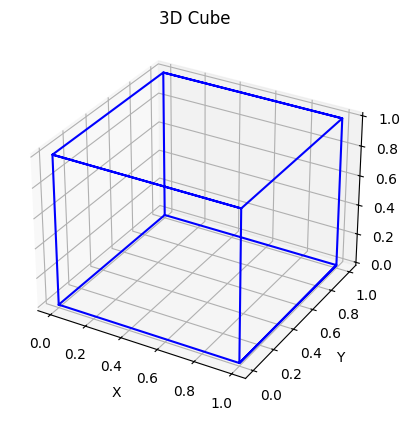

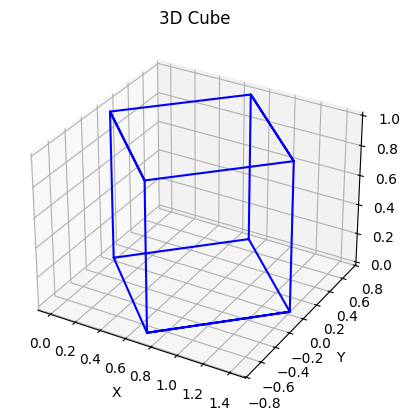

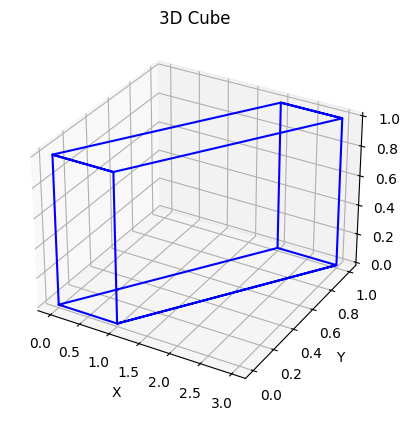

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def create_cube():
    cube = np.array([
        [0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0], [0, 0, 0],  # bottom side
        [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1], [0, 0, 1],  # top side
        [1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1], [0, 1, 1], [0, 1, 0] # vertical edges
    ])
    return cube


# Plot a 3D object
def plot3D_obj(obj, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(obj[:, 0], obj[:, 1], obj[:, 2], color='b')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    plt.show()

# Create cube data
cube = create_cube()

# Plot the cube
plot3D_obj(cube, "3D Cube")

def rotate_z(obj, angle):
    rad_angle = -np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(rad_angle), -np.sin(rad_angle), 0],
        [np.sin(rad_angle), np.cos(rad_angle), 0],
        [0, 0, 1]
    ])
    return obj @ rotation_matrix.T

def shear_xyz(points, shear_factor):
    shear_matrix = np.array([
        [1, shear_factor, 0],
        [0, 1, 0],
        [0, 0, 1]
    ])
    return points.dot(shear_matrix.T)

plot3D_obj(rotate_z(cube, 45), "3D Cube")
plot3D_obj(shear_xyz(cube, 2), "3D Cube")




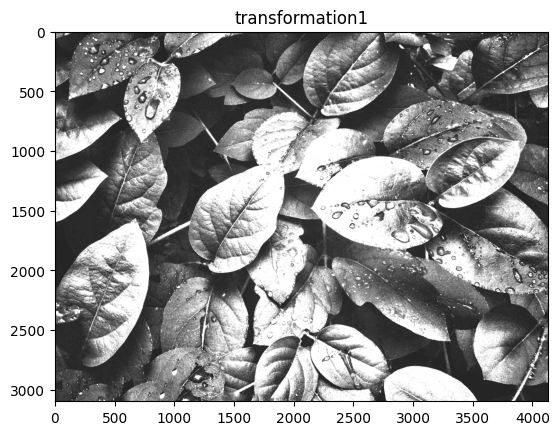

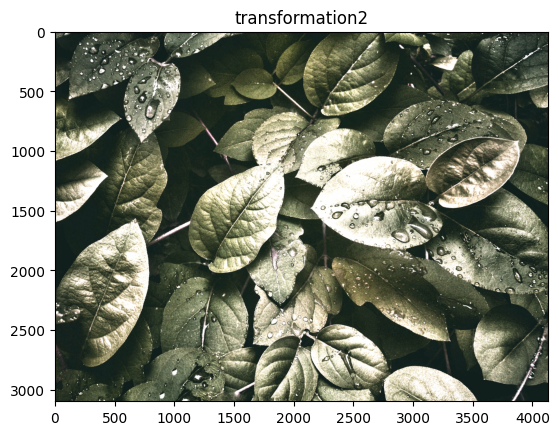

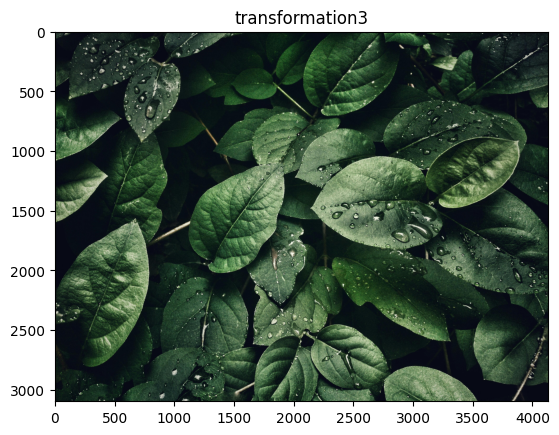

In [18]:
import cv2
import numpy as np

image = cv2.imread('dark.jpg')

transformation_matrix = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
transformed = cv2.transform(image, transformation_matrix, None)
plt.title('transformation1')
plt.imshow(transformed)
plt.show()

transformation_matrix = np.array([[0, 1, 1], [1, 1, 0], [1, 0, 1]])
transformed = cv2.transform(image, transformation_matrix, None)
plt.title('transformation2')
plt.imshow(transformed)
plt.show()

transformation_matrix = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]])
transformed = cv2.transform(image, transformation_matrix, None)
plt.title('transformation3')
plt.imshow(transformed)
plt.show()

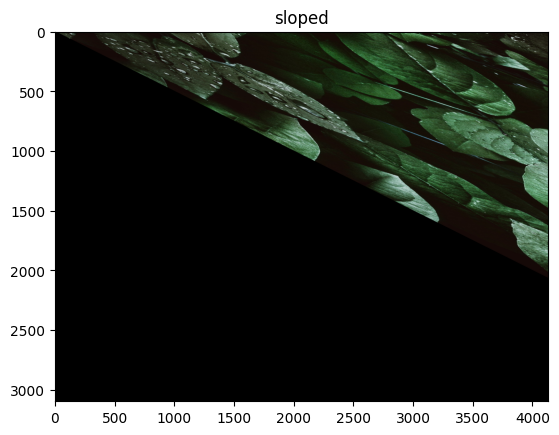

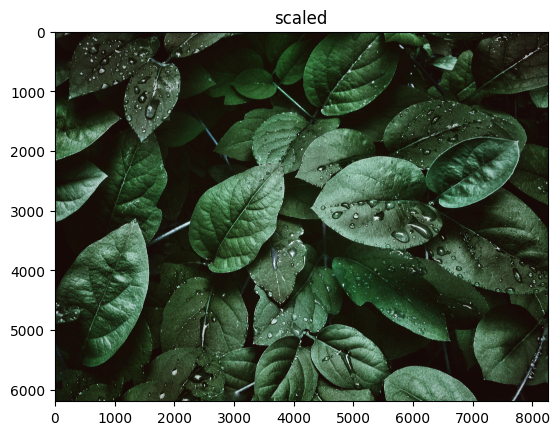

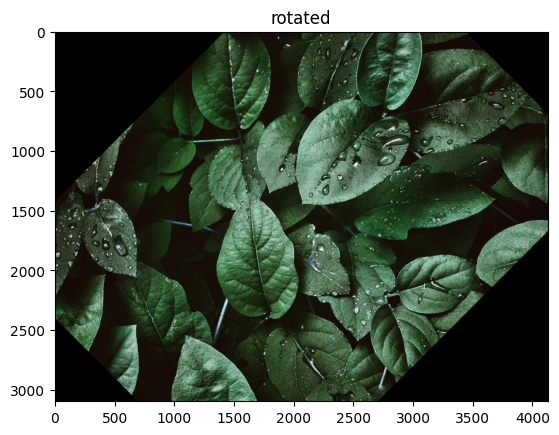

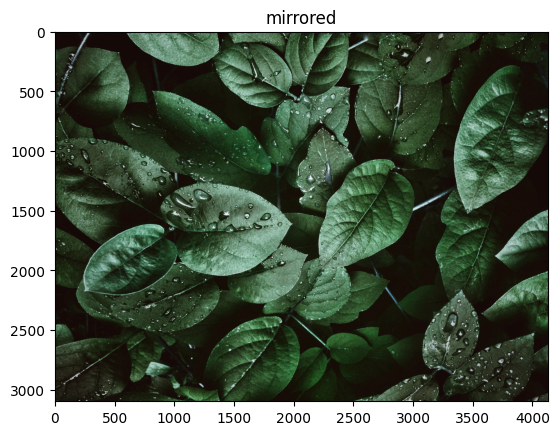

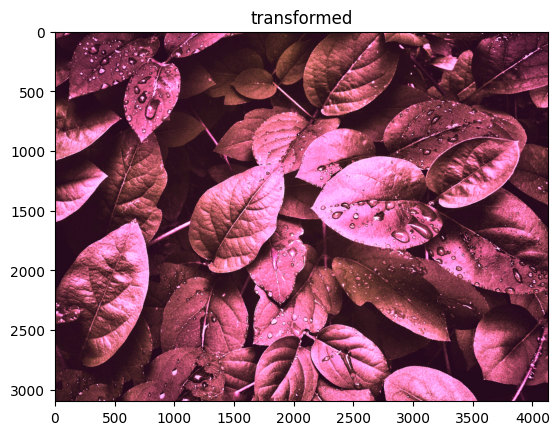

In [16]:
import cv2

def cv_rotate(obj, angle, scale=1.0):
    rows, cols = obj.shape[:2]
    center = (cols / 2, rows / 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    rotated_image = cv2.warpAffine(obj, rotation_matrix, (cols, rows))
    return rotated_image

def cv_scale(obj, scale_factor):
    scaled_image = cv2.resize(obj, None, fx=scale_factor, fy=scale_factor)
    return scaled_image

def cv_mirror(obj, axis):
    if axis == 'x':
        flipped_image = cv2.flip(obj, 0)  
    elif axis == 'y':
        flipped_image = cv2.flip(obj, 1) 
    elif axis == 'xy':
        flipped_image = cv2.flip(obj, -1)  

    return flipped_image

def cv_slope(obj, c, axis):
    if axis == 'x':
        M = np.float32([[1, c, 0], [0, 1, 0]])
    elif axis == 'y':
        M = np.float32([[1, 0, 0], [c, 1, 0]])
    else:
        return obj
    sloped = cv2.warpAffine(obj, M, (image.shape[1], image.shape[0]))
    return sloped
# for points
def cv_transform(obj, transformation_matrix):
    return cv2.transform(obj, transformation_matrix, None)

# show
sloped = cv_slope(image, 2, 'x')
plt.title('sloped')
plt.imshow(sloped)
plt.show()

scaled = cv_scale(image, 2)
plt.title('scaled')
plt.imshow(scaled)
plt.show()

rotated = cv_rotate(image, 45)
plt.title('rotated')
plt.imshow(rotated)
plt.show()

mirrored= cv_mirror(image, 'xy')
plt.title('mirrored')
plt.imshow(mirrored)
plt.show()

transformed = cv_transform(image, np.array([[1, 1, 1],
                                            [0, 1, 0],
                                            [1, 0, 1]]))
plt.title('transformed')
plt.imshow(transformed)
plt.show()

